In [ ]:
#%pip install biolearn
#%pip install scikit-learn
#%pip install matplotlib
#%pip install xgboost
#%pip install yellowbrick
#%pip install tensorflow

In [1]:
from biolearn.data_library import DataLibrary

In [2]:
import pandas as pd

#Download the data file for the warmup challenge linked here https://www.synapse.org/#!Synapse:syn52966292/wiki/625231
DOWNLOADED_DATA_FILE_PATH="warmup_challenge_methylation/challenge_data.csv"
challenge_data = pd.read_csv(DOWNLOADED_DATA_FILE_PATH, index_col=0)
challenge_data

from biolearn.data_library import DataLibrary
data = DataLibrary().get("GSE40279").load()
data.metadata


,age,sex,ethnicity,tissue
id,,,,
GSM989827,67.0,1,Caucasian - European,whole blood
GSM989828,89.0,1,Caucasian - European,whole blood
GSM989829,66.0,1,Caucasian - European,whole blood
GSM989830,64.0,1,Caucasian - European,whole blood
GSM989831,62.0,1,Caucasian - European,whole blood
...,...,...,...,...
GSM990623,78.0,1,Caucasian - European,whole blood
GSM990624,71.0,2,Caucasian - European,whole blood
GSM990625,68.0,2,Caucasian - European,whole blood


In [3]:
from sklearn.utils import shuffle
import numpy as np
X = data.dnam.transpose()
X_df = pd.DataFrame(X)
y = data.metadata['age']
y_df = pd.DataFrame(y)



In [ ]:
data.dnam.transpose()

In [ ]:
print(data.dnam.transpose().columns[2])

In [4]:

cb= pd.concat([X_df, y_df], axis=1)
#cb.head()
cb.head()
choose = cb[['cg09809672', 'cg22736354', 'cg02228185', 'cg01820374', 'cg06493994', \
             'cg19761273','cg00000289','cg00009038','cg00035074','cg00008033','cg00000029',\
                 'cg00000165','cg00000236','cg00034130','cg00000109','cg25809905','cg17861230','age']]

choose= shuffle(choose)
# Drop all rows with NaN values
choose = choose.dropna()

# Reset Index
choose.reset_index(inplace=True, drop=True)

choose.head()


,cg09809672,cg22736354,cg02228185,cg01820374,cg06493994,cg19761273,cg00000289,cg00009038,cg00035074,cg00008033,cg00000029,cg00000165,cg00000236,cg00034130,cg00000109,cg25809905,cg17861230,age
0,0.314096,0.264207,0.610373,0.227045,0.217713,0.237461,0.597681,0.503828,0.904005,0.129713,0.385611,0.193857,0.709649,0.096548,0.876469,0.393175,0.295671,81.0
1,0.371954,0.322967,0.721257,0.265470,0.257042,0.221361,0.662173,0.608930,0.890646,0.114869,0.524322,0.216432,0.807272,0.094145,0.908788,0.570610,0.328375,70.0
2,0.411196,0.287040,0.747243,0.266341,0.281228,0.209015,0.579946,0.588713,0.874145,0.141142,0.468539,0.165837,0.726624,0.123227,0.882298,0.431891,0.261526,69.0
3,0.319104,0.294089,0.534162,0.238458,0.315823,0.284890,0.660388,0.594955,0.889496,0.093693,0.426712,0.095731,0.729383,0.095240,0.934000,0.433216,0.335133,73.0
4,0.494163,0.310242,0.671928,0.237996,0.266545,0.205083,0.563126,0.529246,0.892864,0.226590,0.520289,0.138881,0.862177,0.110631,0.782596,0.495439,0.293417,62.0


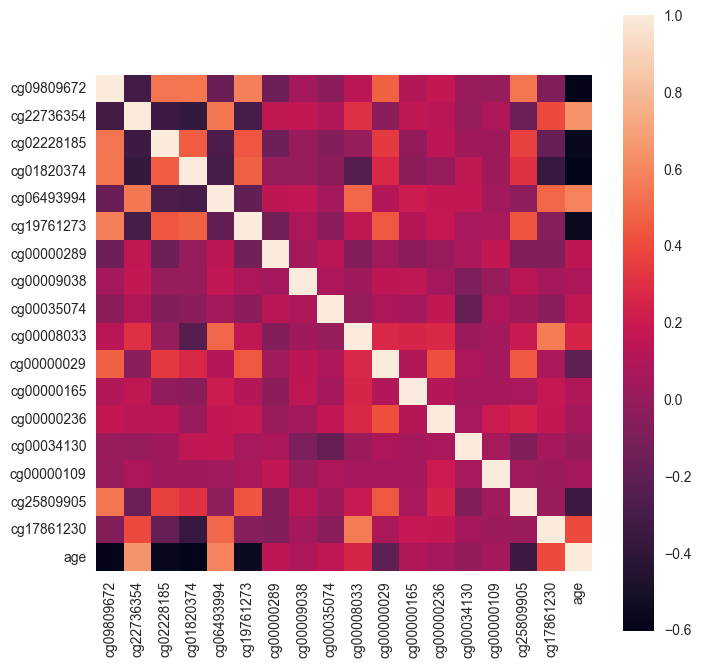

In [5]:
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot
import seaborn as sb

C_mat = choose.corr()
fig = plt.figure(figsize = (8,8))

sb.heatmap(C_mat, vmax=1, square=True)
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
std_scaler = StandardScaler()
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

# Normalizing the methylation and sex data with a Standard Scaler.
X = choose.drop('age', axis=1)

# Separating X vs. y dataframes
X_std = pd.DataFrame(std_scaler.fit_transform(X), columns=X.columns)
y = choose['age']
# Separating dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

random_forest_regressor = RandomForestRegressor(n_estimators = 17, random_state = 0)
random_forest_regressor.fit(X_train, y_train)

# Accuracy on the testing set
test_acc = random_forest_regressor.score(X_test, y_test)
print(test_acc)


predictions = random_forest_regressor.predict(X_test)

# Since age cannot be negative, changing all negative predictions to age 0
for n, element in enumerate(predictions):
    if element < 0:
        predictions[n] = 0

# Looking at sample predictions for the testing set
for i in range(0, 10):
  print("Prediction:", predictions[i],"\tActual:", y_test.iloc[i])

0.6453414816263311
Prediction: 68.6470588235294 	Actual: 57.0
Prediction: 74.88235294117646 	Actual: 71.0
Prediction: 51.470588235294116 	Actual: 34.0
Prediction: 74.58823529411765 	Actual: 74.0
Prediction: 60.76470588235294 	Actual: 63.0
Prediction: 59.470588235294116 	Actual: 63.0
Prediction: 59.588235294117645 	Actual: 43.0
Prediction: 63.1764705882353 	Actual: 70.0
Prediction: 69.11764705882354 	Actual: 65.0
Prediction: 48.11764705882353 	Actual: 64.0


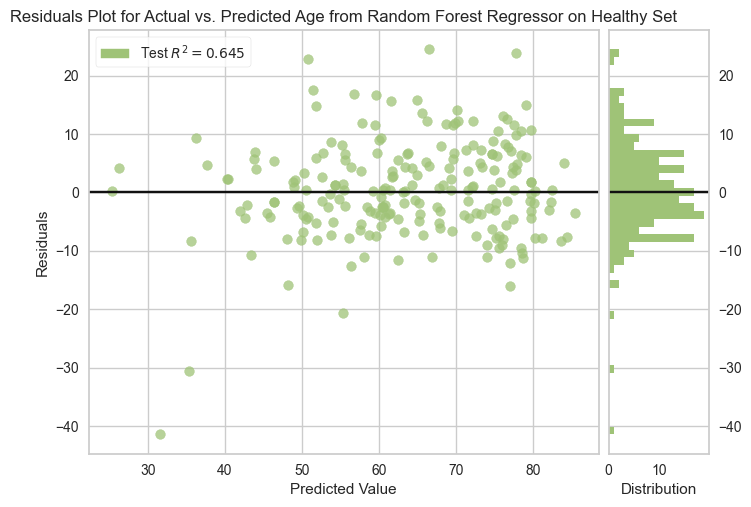

<Axes: title={'center': 'Residuals Plot for Actual vs. Predicted Age from Random Forest Regressor on Healthy Set'}, xlabel='Predicted Value', ylabel='Residuals'>

In [13]:
visualizer = ResidualsPlot(random_forest_regressor, title="Residuals Plot for Actual vs. Predicted Age from Random Forest Regressor on Healthy Set")

visualizer.score(X_test, y_test)
visualizer.show()

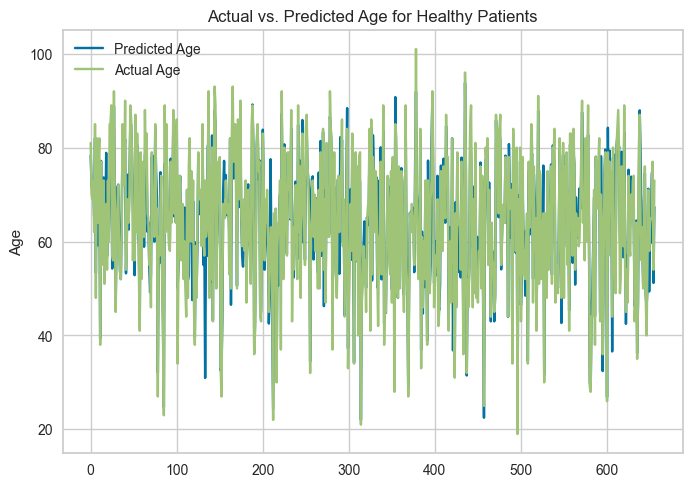

In [8]:
predictions = random_forest_regressor.predict(X)
plt.plot(predictions)
plt.plot(y)
plt.title("Actual vs. Predicted Age for Healthy Patients")
plt.ylabel('Age')
plt.legend(['Predicted Age', 'Actual Age'], loc='upper left')
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
X = choose.drop('age', axis=1)
y = choose['age']

# Parameters for bootstrap and feature selection
n_bootstrap = 20
threshold = 0.05

# Store count of times each CpG site is deemed significant
cpg_counts = np.zeros(X.shape[1])

# Begin bootstrap iterations
for _ in range(n_bootstrap):
    # Sample with replacement from X, y
    sample_idx = np.random.choice(range(X.shape[0]), size=X.shape[0], replace=True)
    X_sample = X[sample_idx]
    y_sample = y[sample_idx]

    # Train model
    model = LinearRegression()
    model.fit(X_sample, y_sample)

    # Identify significant CpG sites (based on magnitude of coefficients)
    significant_cpgs = np.where(np.abs(model.coef_) > threshold)[0]
    cpg_counts[significant_cpgs] += 1

# Determine stable CpG sites
stable_cpg_sites = np.where(cpg_counts > n_bootstrap * 0.6)[0]
stable_cpg_names = data.dnam.index[stable_cpg_sites].tolist()

print(f"Stable CpG sites (associated with age in more than 60% of bootstrap samples): {stable_cpg_sites}")

KeyError: "None of [Index([ 99, 463, 602, 551,   5,  48,  54, 173,  52,  62,\n       ...\n       454,  38, 383,  50, 434, 638, 604, 147, 219, 125],\n      dtype='int32', length=656)] are in the [columns]"

In [ ]:
#Seperate data into training and test sets

# df = data.dnam.transpose()
# df['age'] = data.metadata['age']
# top_sites_df = df[stable_cpg_names]

# X = top_sites_df
# y = df['age']

# X= np.array(X)
# y=np.array(y)
# display(X)
# display(y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# display(X_train.shape)
# display(y_train.shape)
# display(X_test.shape)
# display(y_test.shape)

In [16]:
#Train a model using elastic net
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

model = ElasticNet(alpha=0.01, l1_ratio=0.3, max_iter=10000)
# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error on Test Data: {mse}")

Mean Squared Error on Test Data: 88.71803674239207


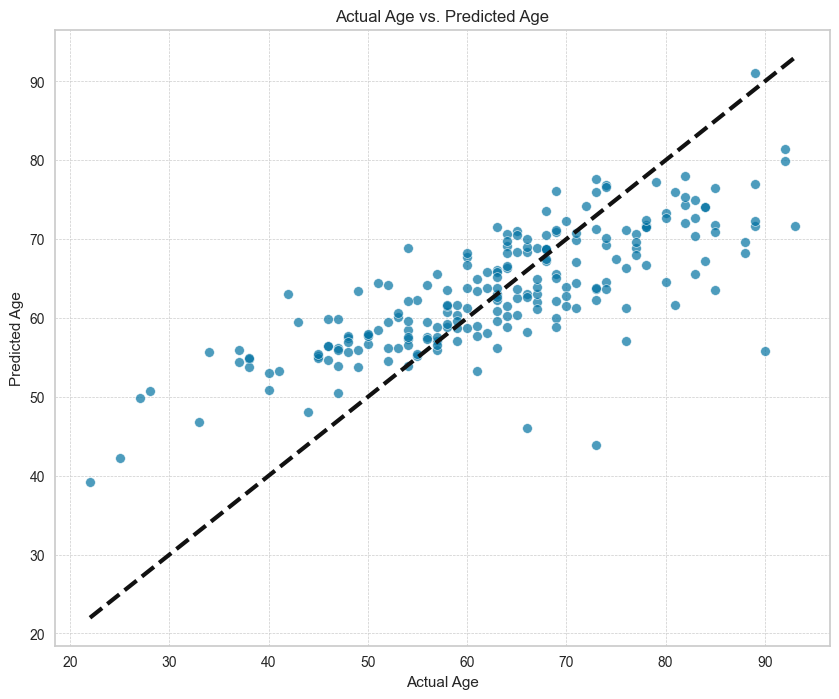

Mean Squared Error (MSE): 88.7180
Mean Absolute Error (MAE): 7.3168


In [17]:
#Plot the results to see how good our model is
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)  # y=x line for reference
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual Age vs. Predicted Age')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred) ** 2)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test - y_pred))
print(f"Mean Absolute Error (MAE): {mae:.4f}")

In [ ]:
display(X_train)
display(X_train.shape)
x_train=np.array(X_train)
display(x_train)
display(x_train.shape)


Y_train=np.array(y_train)
display(Y_train)
display(Y_train.shape)
X_features=list(X_train)

display(X_features)

#feature_names=

c:\Users\25258\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:58:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators", "slient" } are not used.

  warnings.warn(smsg, UserWarning)


mse: 48.74548982338789


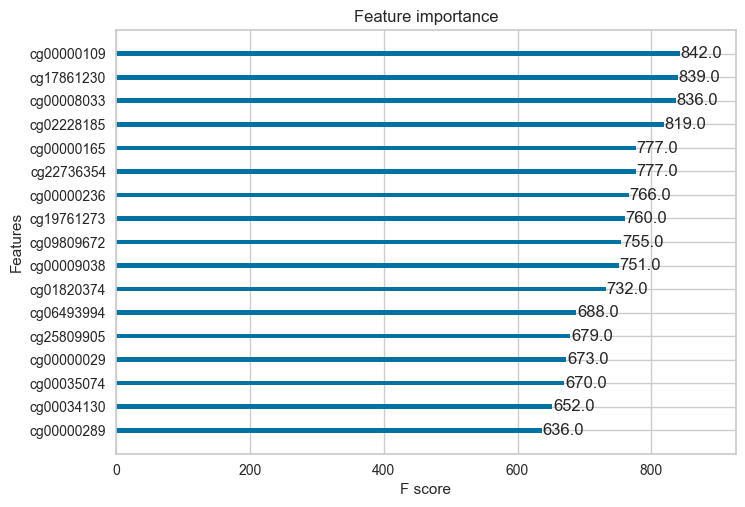

In [18]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from xgboost import plot_importance
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
params = {
    'booster': 'gbtree',
    'objective': 'reg:gamma',
    'gamma': 0,
    'max_depth': 20,
    'lambda': 0.5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'slient': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
    'learning_rate': 0.1,
    'alpha': 0,
    'n_estimators': 10
}

dtrain = xgb.DMatrix(X_train,y_train)
num_rounds = 300
plst = list(params.items())
model = xgb.train(plst,dtrain,num_rounds)

dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)
print('mse:', mean_squared_error(y_test, ans))

plot_importance(model)
plt.show()

Feature: cg00000109, Importance: 842.0
Feature: cg17861230, Importance: 839.0
Feature: cg00008033, Importance: 836.0
Feature: cg02228185, Importance: 819.0
Feature: cg22736354, Importance: 777.0
Feature: cg00000165, Importance: 777.0
Feature: cg00000236, Importance: 766.0
Feature: cg19761273, Importance: 760.0
Feature: cg09809672, Importance: 755.0
Feature: cg00009038, Importance: 751.0
Feature: cg01820374, Importance: 732.0
Feature: cg06493994, Importance: 688.0
Feature: cg25809905, Importance: 679.0
Feature: cg00000029, Importance: 673.0
Feature: cg00035074, Importance: 670.0
Feature: cg00034130, Importance: 652.0
Feature: cg00000289, Importance: 636.0


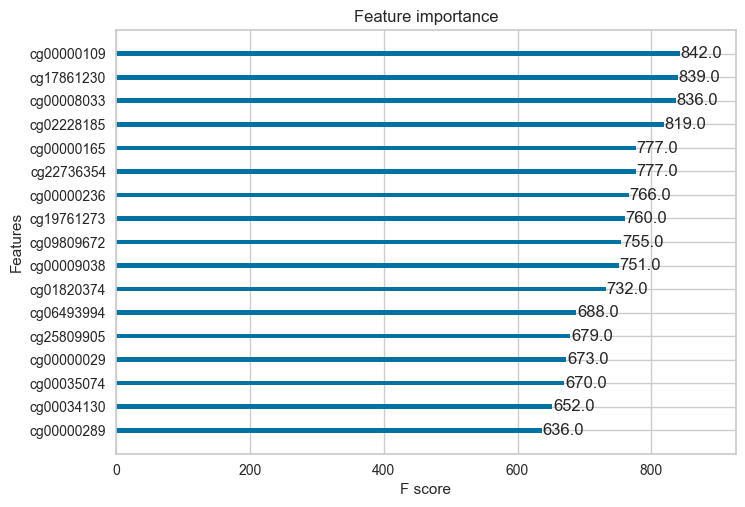

In [19]:
import xgboost as xgb
import matplotlib.pyplot as plt

feature_importance = model.get_score(importance_type='weight')

# Convert feature importance to a sorted list of tuples
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Select the top 10 features
top_10_features = sorted_feature_importance[:50]

# If you want to display the top 10 features
for feature, importance in top_10_features:
    print(f"Feature: {feature}, Importance: {importance}")

# Optionally, you can plot these top 10 features
xgb.plot_importance(model, max_num_features=30)
plt.show()
